 ## import liblaries

In [2]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization 
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title
# import requirement sklearn functions


In [3]:
# import requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [4]:
data = pd.read_csv('bank_loan.csv')
df = pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


👉 According to above information:

Dataset has 5000 datapoints.
Dataset has 14 columns including:
13 columns by int64 type: ID, Age, Experience, Income, ZIP Code, Family, Education, Moragage, Personal Loan, Securities Account, CD Account, Online and CreditCard
1 column by object type: CCAvg
Target is Personal Loan column and other columns are features.
It seems that there is no missing value, but there may be invalid values, so we will check this case further.

It seems that the / sign in column CCAvg represents a decimal. Therefore, we first correct the CCAvg column by replace . instead of / and then convert type of CCAvg to float64:

In [7]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [8]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.50,2121.85,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0



It seems that we have a negative value in the Experience column, which is illogical, so since we do not have access to the owner of the data, we assume that the negative data was actually positive, so we convert the negative numbers into positive ones.

In [10]:
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,4412,23,-2,75,90291,2,1.80,2,0,0,0,0,1,1
4481,4482,25,-2,35,95045,4,1.00,3,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0
4582,4583,25,-1,69,92691,3,0.30,3,0,0,0,0,1,0


In [11]:
# convert above 52 rows to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
df.isna().sum().to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIP Code has 468 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [14]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
--------------------------------------------------
Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities Account:
Securities Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD Account:
CD Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online:
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# drop ID and ZIP Code columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


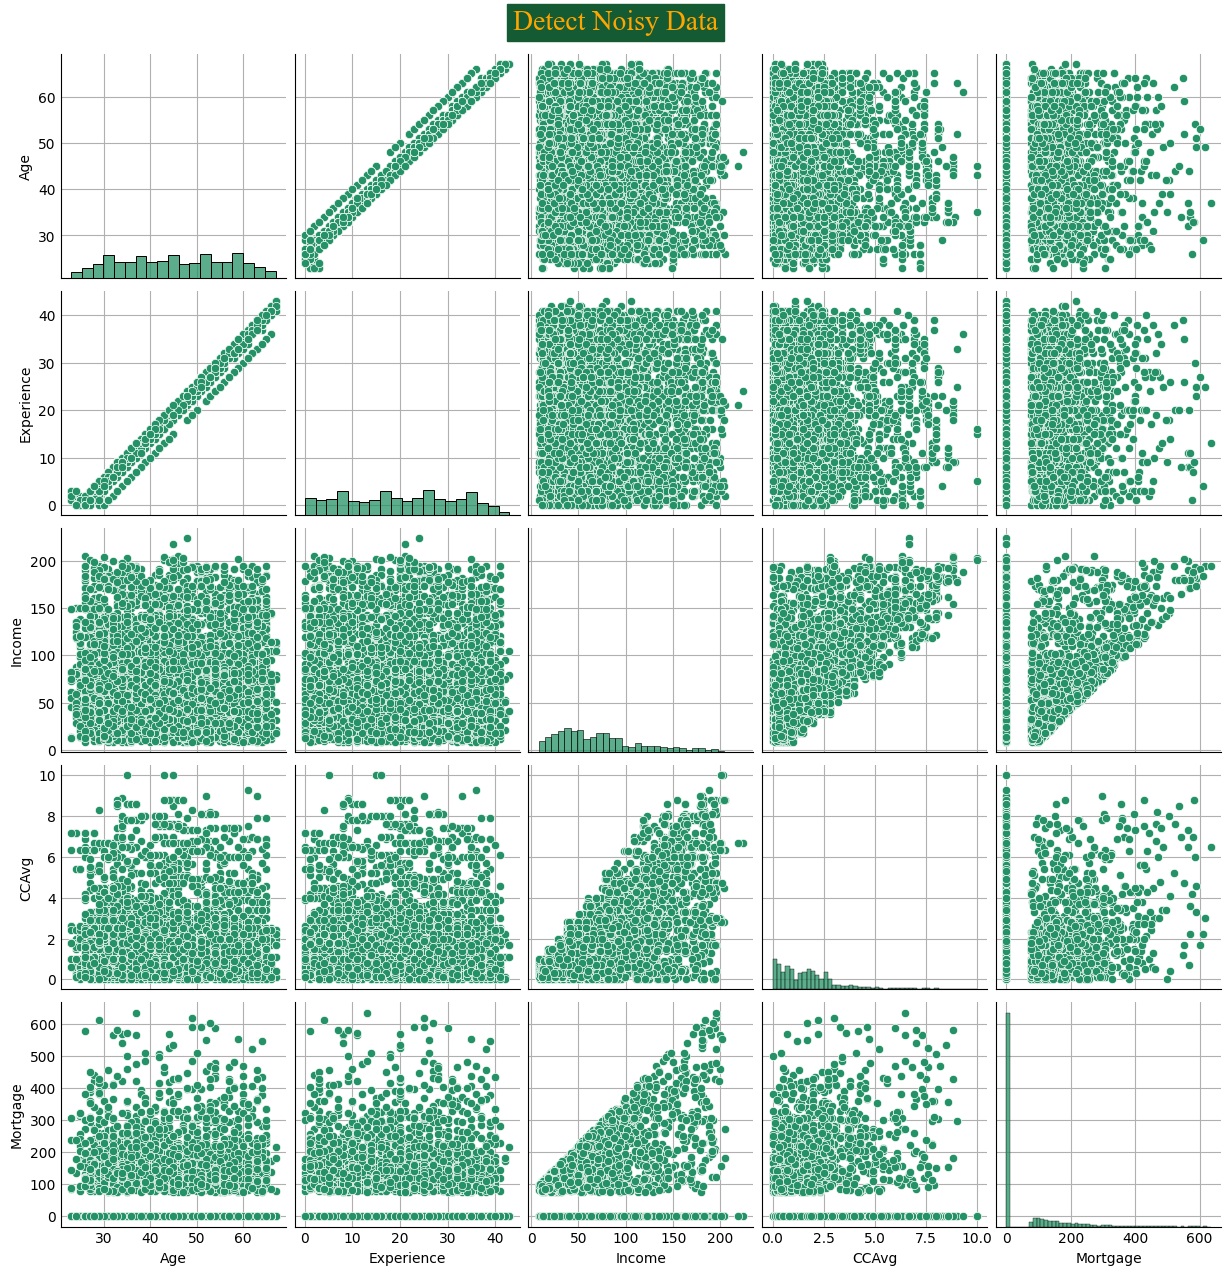

In [17]:
# check noisy data
%matplotlib inline
sns.set_palette('summer')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)

plt.show()

In [18]:
df['Income'] = round(df['Income']/12, 2)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0


In [ ]:
# check distribution Scatter matrix (splom) with go.Splom
sns.set_palette('summer')
fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.02, **FONT)
plt.show()

In [ ]:
sns.set_palette("summer_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [ ]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T